In [1]:
# Logistic Regression- To evaluate the probability that bank customers will buy term deposits when Marketing Department engages them 

#Import the modules and packages

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size= 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Import more modules and read dataset into the panda dataframe

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes= True)

df=pd.read_csv('banking.csv')

#Remove duplicates, check/remove field statistics and nulls

df.drop_duplicates(inplace= True)

df.describe()

df.columns

df.isnull().sum()

df.shape

(41176, 21)

In [3]:
#I check the character types in the respective fields

df.dtypes

df.marital.head()

0    married
1    married
2     single
3    married
4    married
Name: marital, dtype: object

In [4]:
# I check the unique rows in the education field, and group the similar levels.Here, I decided to replace 'basic.4y', 'basic.6y' and 'basic.9y' with 'basic'

df.education.unique()

df['education']= np.where(df['education']=='basic.9y', 'Basic', df['education'])

In [6]:
#Using Replace function with lambda

df['education']= df.education.astype(str).apply(lambda x: x.replace('basic.9y', 'Basic'))

df['education']= df.education.astype(str).apply(lambda x: x.replace('basic.6y', 'Basic'))

df['education']= df.education.astype(str).apply(lambda x: x.replace('basic.4y', 'Basic'))

df.education.value_counts()/df.education.shape[0]

df.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

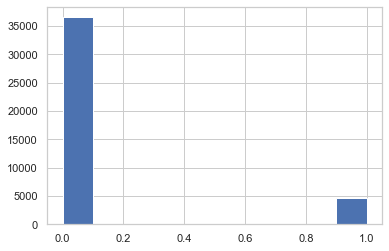

In [71]:
#Data Exploration

df.y.value_counts()
df['y'].hist()


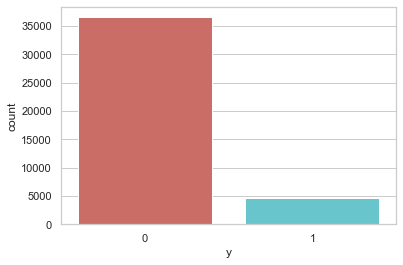

<Figure size 432x288 with 0 Axes>

In [9]:
#To view the distribution of client subscription to term deposit

sns.countplot(x='y', data=df, palette='hls')

plt.show()

plt.savefig('countplot')

In [10]:
#Percentage of distribution#-----Only 11.27% shows yes, while 88.73% shows no

(df.y.value_counts()/df.shape[0])*100

0    88.733728
1    11.266272
Name: y, dtype: float64

In [11]:
#At the ratio of 89:11 for not-subcribed to subscribed, the classes are skewed. Done differently:

count_subscribed = len(df[df.y==1])

count_not_subscribed = len(df[df.y==0])

pct_subscribed = (count_subscribed/ (count_subscribed+count_not_subscribed))*100

print('Percentage of Subscription',pct_subscribed)

print('Percentage of no Subscription', 100-pct_subscribed)

Percentage of Subscription 11.266271614532737
Percentage of no Subscription 88.73372838546726


In [12]:
#Using traditional SQL groupby for further exploration. This reveals that:
#The average age of customers that bought investment product is higher than that of customers that did not buy
#As expected, the days since customer was last contacted is lower for those that bought product
#However, it is interesting to see that campaings are lower for customers that bought the term deposit

df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
1,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


In [13]:
# For further insights, I drew the categorical means for other categorical variables

df.groupby('job').mean()

df.groupby('marital').mean()

df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.164162,263.054987,2.559623,974.876039,0.141065,0.191256,93.639905,-40.927957,3.729564,5172.012596,0.087036
high.school,37.996951,260.949117,2.568860,964.347456,0.185976,0.032843,93.584890,-40.940317,3.556085,5164.988394,0.108389
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.083969,252.566603,2.586832,960.744084,0.163168,0.172309,93.569755,-40.123893,3.709739,5170.122805,0.113550
university.degree,38.876356,253.237340,2.563713,951.792174,0.192453,-0.027425,93.493711,-39.976726,3.530225,5163.248027,0.137208
unknown,43.485549,262.491329,2.597110,942.798266,0.226590,0.058324,93.658465,-39.876185,3.570291,5159.509884,0.145087


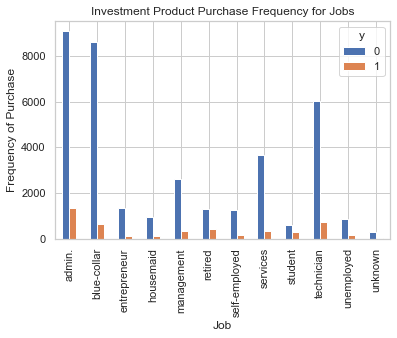

In [14]:
#Visualization : The job title is a good predictor of the outcome variable

%matplotlib inline

pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Investment Product Purchase Frequency for Jobs')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_with_job')

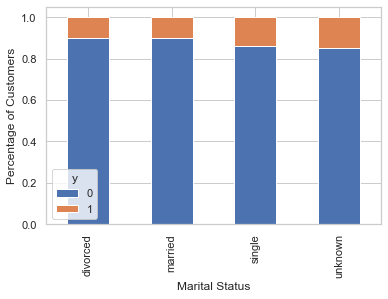

In [15]:
# Marital status does not seem a good predictor for the outcome variable.

MaritalY_table= pd.crosstab(df.marital, df.y)
MaritalY_table.div(MaritalY_table.sum(1).astype(float),axis =0).plot(kind='bar',stacked= True)
plt.title=('Marital Status vs. Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Customers')
plt.savefig('Stacked_Marital_vs_Purchase')

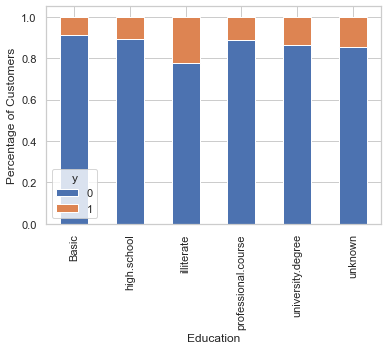

In [16]:
#Education seenms a great predictor of the outcome variable

EducaY_table= pd.crosstab(df.education, df.y)
EducaY_table.div(EducaY_table.sum(1).astype(float),axis =0).plot(kind='bar',stacked= True)
plt.title=('Education vs. Purchase')
plt.xlabel('Education')
plt.ylabel('Percentage of Customers')
plt.savefig('Stacked_Education_vs_Purchase')

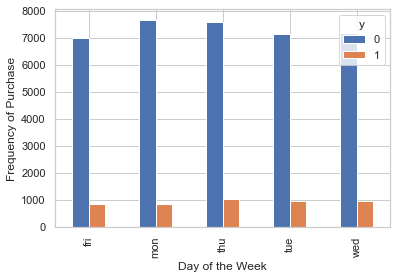

In [18]:
#Day of the week may not be a good predictor of the outcome variable

pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_with_weekday')

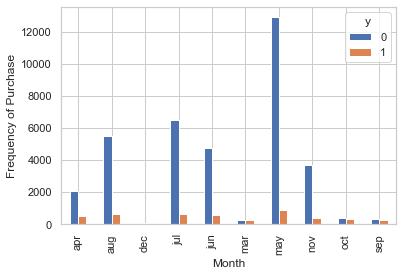

In [20]:
#Month might be a good predictor of the outcome variable

pd.crosstab(df.month,df.y).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_with_month')

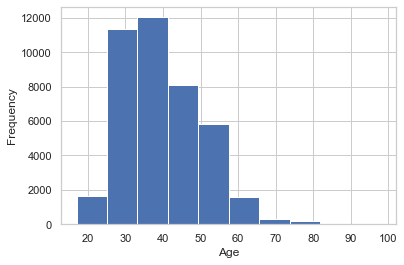

In [23]:
#Evaluating age distribution.Most of the bank customers studied in this dataset fall in the 30-40 age range

df.age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Distr_age')

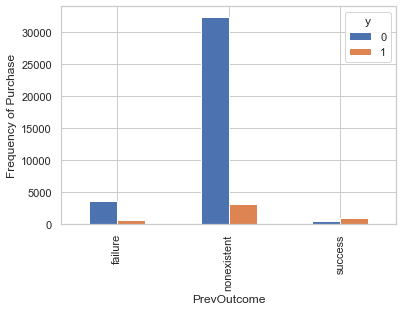

In [26]:
#Investment Product Purchase Frequency with Previous Campaign Outcome

pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.xlabel('PrevOutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_with_prevoutcome')

In [27]:
#Previous campaign outcome seems to be a good predictor of the outcome variable
# Creating dummy variables from categorical vars. As there are many in the dataset, I use a 'for' loop

cat_vars= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in cat_vars:
    
    cat_list= 'var'+''+var
    
    cat_list =pd.get_dummies(df[var],prefix=var)
    
    df1=df.join(cat_list)
    
    df=df1

In [28]:
# We remove the actual categorical variables, as the dummies are created

cat_vars= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

df_vars= df.columns.values.tolist()

to_keep = [i for i in df_vars if i not in cat_vars]

In [29]:
#The dataframe is now subset to keep only columns in the to_keep list

df_final =df[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [30]:
# To work on the unbaalanced dataset,I up-sample the subscription number, using SMOTE algorithm
# The Synthetic Minority Oversampling Technique chooses the k-nearest-neighbors to create a similar, but randomly tweaked, new observations

x= df_final.loc[:, df_final.columns != 'y']

y= df_final.loc[:, df_final.columns=='y']

from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state = 0)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)
columns = x_train.columns

OS_df_x, OS_df_y = OS. fit_sample(x_train, y_train)

OS_df_x = pd.DataFrame(data= OS_df_x, columns= columns)

OS_df_y = pd.DataFrame(data= OS_df_y, columns = ['y'])

In [32]:
#I'd check the distribution of the dataset, post SMOTING

print('length of oversampled data is', len(OS_df_x))

print('number of no subscription in oversampled data', len(OS_df_y[OS_df_y['y']==0]))

print('number of subscription in oversampled data', len(OS_df_y[OS_df_y['y']==1]))

print('proportion of no subscription in oversampled data is', len(OS_df_y[OS_df_y['y']==0])/len(OS_df_x))

print('proportion of subscription is', len(OS_df_y[OS_df_y['y']==1])/len(OS_df_x))


length of oversampled data is 51162
number of no subscription in oversampled data 25581
number of subscription in oversampled data 25581
proportion of no subscription in oversampled data is 0.5
proportion of subscription is 0.5


In [33]:
#Performing feature selection to decide the significant X variables through Recursive Feature Elimination(RFE)

df_final_vars= df_final.columns.values.tolist()

y= ['y']

x= [i for i in df_final_vars if i not in y]
      
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)

rfe = rfe.fit(OS_df_x, OS_df_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

C:\Users\jider\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True False  True False False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[39 37 35 40 34 32 31 38 30 36 11  4  5  9 10 14  8  6 15  7 13 12  1  1
  1  1  1  1 41  1  1  1  1  1 42  1  1  1  3  1  2 19 18 25 20 27 22 24
 29 23 21 28 26  1  1  1  1  1 17 16 33]


In [45]:
#For the final model, I used the support(True/False) and ranking(1/non-1's) to select the features below
#The constant is added as a base rate of subscription for investment product. Statmodels should include intercepts
# I used variance inflation factor to identify possible multicollinearity among the predictors

OS_df_x['constant']= 1

cols=['constant','euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular','contact_telephone','month_apr','month_aug','month_dec','month_jul','month_jun','month_mar', 'month_may','month_nov','month_oct',"poutcome_failure", "poutcome_success"]

x=OS_df_x[cols]
y=OS_df_y['y']

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index= x.columns)


         Current function value: 0.320418
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51162
Model:                          Logit   Df Residuals:                    51141
Method:                           MLE   Df Model:                           20
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:                  0.5377
Time:                        20:20:52   Log-Likelihood:                -16393.
converged:                      False   LL-Null:                       -35463.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                29.5122    127.373      0.232      0.817    -220.135     279.159
euribor3m               -0.4509    

C:\Users\jider\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


constant                30.733006
euribor3m                2.535908
job_blue-collar          1.135521
job_housemaid            1.015919
marital_unknown          1.000868
education_illiterate     1.000710
default_no               2.842361
default_unknown          2.906355
contact_cellular         3.274291
contact_telephone        4.033929
month_apr                1.226677
month_aug                1.649560
month_dec                1.018390
month_jul                1.893080
month_jun                1.649228
month_mar                1.052854
month_may                2.147253
month_nov                1.409864
month_oct                1.076317
poutcome_failure         1.129964
poutcome_success         1.225316
dtype: float64

In [46]:
# Most predictors have p-values less than 5%, save for 4 others features. I removed variables with p-values greater than 0.05 

cols=['constant','euribor3m','job_blue-collar','job_housemaid','default_no','default_unknown','month_apr','month_aug','month_dec','month_jul', 'month_jun','month_mar','month_may','month_nov','month_oct', "poutcome_failure","poutcome_success"]


x1=OS_df_x[cols]
y1=OS_df_y['y']


logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

pd.Series([variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])],index= x1.columns)

Optimization terminated successfully.
         Current function value: 0.336452
         Iterations 12
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.515     
Dependent Variable:  y                AIC:              34461.1127
Date:                2020-09-27 20:22 BIC:              34611.4395
No. Observations:    51162            Log-Likelihood:   -17214.   
Df Model:            16               LL-Null:          -35463.   
Df Residuals:        51145            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      12.0000                                      
------------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
constant         13.5640   0.7131  19.0201 0.0000  12.1662 14.9617
euribor3m        -0.5428   0.0095 -56.9418 0.0000  -

constant            22.099903
euribor3m            1.780041
job_blue-collar      1.135109
job_housemaid        1.015359
default_no           2.769652
default_unknown      2.834367
month_apr            1.190475
month_aug            1.427187
month_dec            1.015641
month_jul            1.622777
month_jun            1.378634
month_mar            1.045775
month_may            1.700177
month_nov            1.304876
month_oct            1.057241
poutcome_failure     1.125225
poutcome_success     1.215516
dtype: float64

In [58]:
#I tried to compare the Statmodel to sklearn LR method. The Statmodel automatically calculates p-values, unlike sklearn
# However, sklearn is more powerful for calculation-intensive tasks, such as calculating scores, predictions, advanced functions like features selection
# Statmodel.api methods are suitable for exploring and fine-tuning the models

# First, using sklearn (w/o intercept), I built the logistic regression on the entire data. This indicated score at 83% accuracy with rooms for improvement

cols2=['euribor3m','job_blue-collar','job_housemaid','default_no','default_unknown','month_apr','month_aug','month_dec','month_jul','month_jun','month_mar','month_may','month_nov', 'month_oct',"poutcome_failure","poutcome_success"]


x2=OS_df_x[cols2]
y2=OS_df_y['y']

from sklearn import linear_model 
logreg= linear_model.LogisticRegression()

logreg.fit(x2,y2)
logreg.score(x2,y2)

0.8612446737813221

In [66]:
# For the value of the coefficients,indicating the change in the log(odds) for a unit change in the variables

import numpy as np

pd.DataFrame(zip(x2.columns, np.transpose(logreg.coef_)))



,0,1
0,euribor3m,[-0.5382574662903299]
1,job_blue-collar,[-1.0484565272703628]
2,job_housemaid,[-1.2972768513093862]
3,default_no,[-5.99850811132283]
4,default_unknown,[-6.880878694359203]
5,month_apr,[-4.3769630915803885]
6,month_aug,[-4.255726742279976]
7,month_dec,[-3.8915556761938515]
8,month_jul,[-3.7807993714355064]
9,month_jun,[-4.136797961098311]


In [67]:
# Spliting the data into train and test set, building the model with train set and checking model accuracy using the test set

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

logreg2= LogisticRegression()

logreg2.fit(x2_train, y2_train)

logreg2.score(x2_train, y2_train)

logreg2.coef_

y2_hat_train= logreg2.predict(x2_train)

C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Extrapolating the trained model on test to predict the test set result and check accuracy 
# Accuracy of logistic regression on test set is 86%, RMSE is 0.37

y2_hat_test= logreg2.predict(x2_test)

print('Accuracy of logreg classifier on test set: {:.2f}'.format(logreg.score(x2_test, y2_test)))

#Studying other decision criteria- Mean Absolute Error(MAE),Root Mean Squared Error(RMSE)

MAE= mean_absolute_error(y2_test, y2_hat_test)

RMSE = math.sqrt(mean_absolute_error(y2_test, y2_hat_test))

print('Root Mean Squared Error=', RMSE)

print('Mean Absolute Error=', MAE)

Accuracy of logreg classifier on test set: 0.86
Root Mean Squared Error= 0.36953501516772674
Mean Absolute Error= 0.13655612743501205


In [62]:
#Confusion Matrix to compute the classifier's precision, recall, F-measure and support

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, y2_hat_test)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_hat_test))

[[7071  665]
 [1431 6182]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      7736
           1       0.90      0.81      0.86      7613

    accuracy                           0.86     15349
   macro avg       0.87      0.86      0.86     15349
weighted avg       0.87      0.86      0.86     15349



In [63]:
# The 8-fold cross validation method to calculate the accuracy of each iteration 
# The average accuracy is very close to 83% as earlier seen in the split dataset
# Therefore, it can be implied that the model generlises well

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg2,x2,y2, scoring= 'accuracy',cv=8)

print(scores)
print(scores.mean())

C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.69340213 0.87523452 0.8881939  0.89007037 0.89304144 0.87943706
 0.88381548 0.87458952]
0.8597230524501973


C:\Users\jider\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


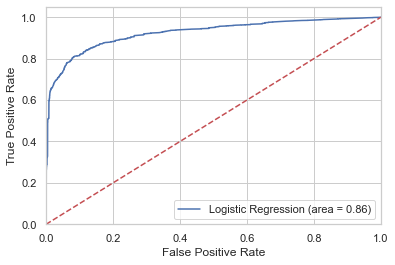

In [64]:
# Receiver Operating Characteristics Curve-ROC curve intercept on positive y axis(true positive rate axis)-suggesting high sensitivity.
# AUC(Area under the curve) approximates 1, indicating a good classifier
# ROC illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y2_test, logreg.predict(x2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg.predict_proba(x2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()